In [17]:
import sys
!{sys.executable} -m pip install numpy


     |████████████████████████████████| 16.0 MB 2.9 MB/s eta 0:00:01


In [23]:
!{sys.executable} -m pip install matplotlib

     |████████████████████████████████| 7.2 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 301 kB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 2.8 MB 3.7 MB/s eta 0:00:01


In [41]:
import math
import numpy as np

[-0.16263687  0.43183601] 0.2129330888064158
[-0.15678194  0.41628991] 0.197877867695447
[-0.14905604  0.39577597] 0.1788563244821747
[-0.14001781  0.37177753] 0.15782351740783743
[-0.13013149  0.34552719] 0.13632324555444594
[-0.11977798  0.31803639] 0.11549390854303504
[-0.10926527  0.29012287] 0.09611017818886489
[-0.09883799  0.26243621] 0.07864171576305566
[-0.08868625  0.23548115] 0.0633166244864187
[-0.07895356  0.20963876] 0.05018207487906064
[-0.06974406  0.18518555] 0.03915792210020795
[-0.06112894  0.16231052] 0.030081451928310896
[-0.0531521   0.14113029] 0.02274290355202578
[-0.04583521  0.12170238] 0.01691233595438003
[-0.03918207  0.10403685] 0.012358901315035725
[-0.03318236  0.08810634] 0.008863796888625179
[-0.02781495  0.0738547 ] 0.006228187395035334
[-0.0230506   0.06120431] 0.004277297541509957
[-0.01885433  0.05006232] 0.002861721876283856
[-0.01518737  0.04032576] 0.0018568229532058438
[-0.01200873  0.03188577] 0.0011609122188639895
[-0.0092765   0.02463111] 0.0

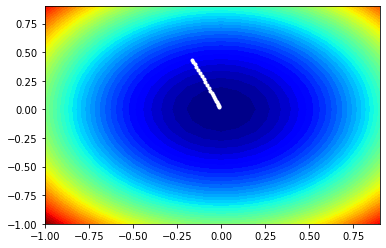

In [105]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

# gradient descent algorithm with nesterov momentum
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, epsilon, step_size, momentum):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	solution_eval = objective(1, 1)
	while solution_eval >= epsilon:
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print(solution, solution_eval)
	return solutions
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
epsilon = 0.001
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, epsilon, step_size, momentum)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()


In [106]:
# objective function
def objective(x):
	return x**2.0

# derivative of objective function
def derivative(x):
	return 2*x

# gradient descent algorithm with nesterov momentum
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = rand()
	# list of changes made to each variable
	change = 0
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution + momentum * change]
		# calculate the gradient for the projection
		gradient = derivative(projected[0])
		# build a solution one variable at a time
		new_solution = list()
		
		# calculate the change
		change = (momentum * change) - step_size * gradient
		# calculate the new position in this variable
		value = solution + change
		# store this variable
		new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution)
		# report progress
		print(solution, solution_eval)
	return solutions
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0], bounds[1], 0.1)
# create a mesh from the axis
x= meshgrid(xaxis)
# compute targets
results = objective(x)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.plot(x, results, levels=50, cmap='jet')
# plot the sample
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

[0.40868156] [0.16702062]
[[0.39396903]] [[0.1552116]]
[[[0.37455502]]] [[[0.14029146]]]
[[[[0.35184334]]]] [[[[0.12379373]]]]
[[[[[0.32700051]]]]] [[[[[0.10692933]]]]]
[[[[[[0.30098372]]]]]] [[[[[[0.0905912]]]]]]
[[[[[[[0.27456689]]]]]]] [[[[[[[0.07538698]]]]]]]
[[[[[[[[0.24836475]]]]]]]] [[[[[[[[0.06168505]]]]]]]]
[[[[[[[[[0.22285498]]]]]]]]] [[[[[[[[[0.04966434]]]]]]]]]
[[[[[[[[[[0.19839822]]]]]]]]]] [[[[[[[[[[0.03936185]]]]]]]]]]
[[[[[[[[[[[0.17525616]]]]]]]]]]] [[[[[[[[[[[0.03071472]]]]]]]]]]]
[[[[[[[[[[[[0.15360766]]]]]]]]]]]] [[[[[[[[[[[[0.02359531]]]]]]]]]]]]
[[[[[[[[[[[[[0.13356308]]]]]]]]]]]]] [[[[[[[[[[[[[0.0178391]]]]]]]]]]]]]
[[[[[[[[[[[[[[0.11517687]]]]]]]]]]]]]] [[[[[[[[[[[[[[0.01326571]]]]]]]]]]]]]]
[[[[[[[[[[[[[[[0.09845854]]]]]]]]]]]]]]] [[[[[[[[[[[[[[[0.00969408]]]]]]]]]]]]]]]
[[[[[[[[[[[[[[[[0.0833822]]]]]]]]]]]]]]]] [[[[[[[[[[[[[[[[0.00695259]]]]]]]]]]]]]]]]
[[[[[[[[[[[[[[[[[0.06989471]]]]]]]]]]]]]]]]] [[[[[[[[[[[[[[[[[0.00488527]]]]]]]]]]]]]]]]]
[[[[[[[[[[[[[[[[[[

/Users/kritpatarapak/PycharmProjects/untitled2/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [59]:
solution = rand()
print(solution)

0.41730480236712697
